<a href="https://colab.research.google.com/github/smmurdock/Data-Viz-Practice/blob/main/Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Packages and Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load data
pollution = pd.read_csv('https://assets.datacamp.com/production/repositories/3841/datasets/a6b11493e11dd47f3e03e0b96e2a2dbc51f03cb2/pollution_wide.csv')
pollution.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


### Hardcoding a highlight

You are working with the city of Houston to look at the relationship between sulfur dioxide (SO2) and nitrogen dioxide (NO2) pollution, specifically, pollution in the most recent year data was collected (2014). You have singled out a particularly bad day, November 26th, where there was a bad spike in the SO2 levels. To draw the viewers attention to this bad day, you will highlight it in a bright orangish-red and color the rest of the points gray.

- [X] Modify the list comprehension to color the value corresponding to the 330th day (November 26th) of the year 2014 to orangered and the rest of the points to lightgray.
- [X] Pass the houston_colors array to regplot() using the scatter_kws argument to color the points.

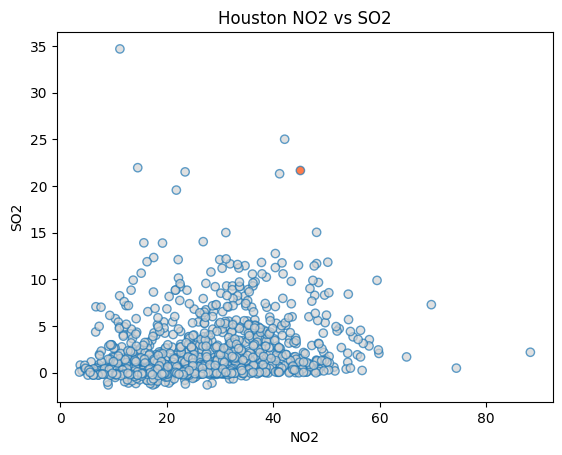

In [7]:
houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray'
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False,
            # Send scatterplot argument to color points
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})

# Label the plot
plt.xlabel('NO2')
plt.ylabel('SO2')
plt.title('Houston NO2 vs SO2')
plt.show();

### Programmatically creating a highlight

You are continuing your work for the city of Houston. Now you want to look at the behavior of both NO2 and SO2 when the un-plotted ozone (O3) value was at its highest.

To do this, replace the logic in the current list comprehension with one that compares a row's O3 value with the highest observed O3 in the dataset. Note: use sns.scatterplot() instead of sns.regplot(). This is because sns.scatterplot() can take a non-color vector as its hue argument and colors the points automatically while providing a helpful legend.

- [X] Find the value corresponding to the highest observed O3 value in the houston_pollution DataFrame. Make sure to type the letter O and not the number zero!
- [X] Append the column 'point_type' to the houston_pollution DataFrame to mark if the row contains the highest observed O3.
- [X] Pass this newly created column to the hue argument of sns.scatterplot() to color the points.

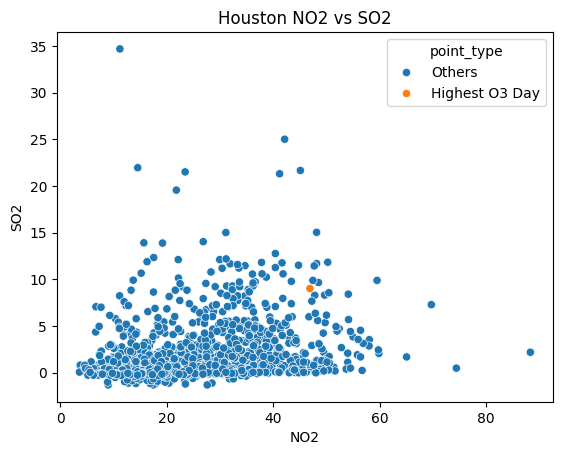

In [9]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point_type',
                data = houston_pollution)

# Label the plot
plt.xlabel('NO2')
plt.ylabel('SO2')
plt.title('Houston NO2 vs SO2')
plt.show();